In [83]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.tsa as tsa

In [74]:
df = pd.read_csv("../data/temperature_readings_from_a_ceramic_furnace.csv", header=None)

In [75]:
df.head()

,0
0,1578.71
1,1578.79
2,1579.38
3,1579.36
4,1579.83


In [76]:
type(df)

pandas.core.frame.DataFrame

In [77]:
df.dtypes

0    float64
dtype: object

In [78]:
df.rename(columns={0: 'temperature'}, inplace=True)

In [79]:
df

,temperature
0,1578.71
1,1578.79
2,1579.38
3,1579.36
4,1579.83
...,...
75,1579.40
76,1578.90
77,1578.50
78,1579.30


<AxesSubplot:xlabel='Time', ylabel='Temperature'>

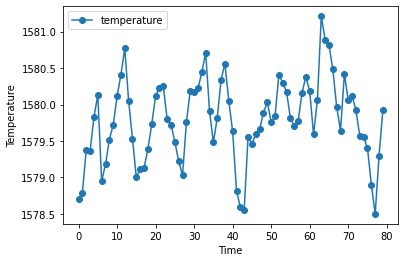

In [80]:
df.plot(marker='o', xlabel='Time', ylabel='Temperature')

### Time Series Analysis

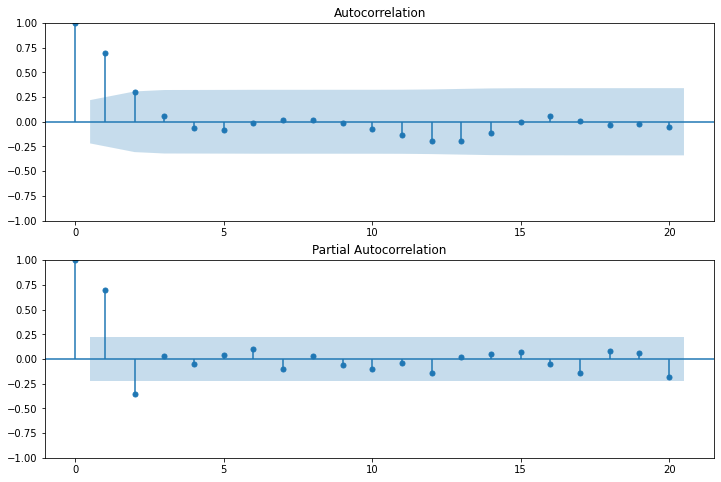

In [82]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
_ = sm.graphics.tsa.plot_acf(df, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
_ = sm.graphics.tsa.plot_pacf(df, lags=20, ax=ax2)

In [86]:
acf, acf_confint, acf_qstat, acf_pvalues = tsa.stattools.acf(df, nlags=20, qstat=True, alpha=0.5)

In [87]:
acf

array([ 1.00000000e+00,  6.93487925e-01,  3.05606286e-01,  5.81583754e-02,
       -6.41291075e-02, -8.19154190e-02, -9.91469918e-03,  2.16463974e-02,
        2.07121567e-02, -7.60448364e-03, -7.53367300e-02, -1.36783565e-01,
       -1.90096234e-01, -1.89840864e-01, -1.15706522e-01, -8.15764343e-04,
        5.39126821e-02,  1.05724542e-02, -3.24777154e-02, -2.37372110e-02,
       -5.27815431e-02])

In [88]:
acf_confint

array([[ 1.00000000e+00,  1.00000000e+00],
       [ 6.18077679e-01,  7.68898172e-01],
       [ 1.99982101e-01,  4.11230472e-01],
       [-5.23798102e-02,  1.68696561e-01],
       [-1.74841166e-01,  4.65829509e-02],
       [-1.92838516e-01,  2.90076782e-02],
       [-1.21181274e-01,  1.01351875e-01],
       [-8.96252012e-02,  1.32917996e-01],
       [-9.05833861e-02,  1.32007699e-01],
       [-1.18921944e-01,  1.03712977e-01],
       [-1.86657144e-01,  3.59836844e-02],
       [-2.48393537e-01, -2.51735929e-02],
       [-3.02655461e-01, -7.75370079e-02],
       [-3.04211208e-01, -7.54705201e-02],
       [-2.31854997e-01,  4.41952977e-04],
       [-1.17617885e-01,  1.15986357e-01],
       [-6.28894712e-02,  1.70714835e-01],
       [-1.06371125e-01,  1.27516033e-01],
       [-1.49426730e-01,  8.44712991e-02],
       [-1.40737505e-01,  9.32630825e-02],
       [-1.69809220e-01,  6.42461336e-02]])

In [89]:
acf_qstat

array([39.93507972, 47.78985571, 48.07801833, 48.43299568, 49.0199089 ,
       49.02862317, 49.07072997, 49.10981604, 49.11515903, 49.64704598,
       51.4258274 , 54.91194437, 58.44059321, 59.77127919, 59.77134635,
       60.06927052, 60.0809095 , 60.19251436, 60.25310888, 60.55769967])

In [90]:
acf_pvalues

array([2.62545398e-10, 4.19338452e-11, 2.04960946e-10, 7.66643376e-10,
       2.19855572e-09, 7.35824244e-09, 2.19769940e-08, 6.05693567e-08,
       1.57931276e-07, 3.09906268e-07, 3.46332804e-07, 1.87690298e-07,
       9.96660006e-08, 1.28665548e-07, 2.76089589e-07, 5.09494733e-07,
       1.01907767e-06, 1.90456028e-06, 3.52878727e-06, 5.83612650e-06])

In [92]:
pacf, pacf_confint = tsa.stattools.pacf(df, nlags=20, alpha=0.5)

In [93]:
pacf

array([ 1.        ,  0.70226625, -0.35463241,  0.02547835, -0.0557172 ,
        0.03644195,  0.09868683, -0.09745465,  0.03193843, -0.0586984 ,
       -0.10040592, -0.04081482, -0.14581954,  0.02389632,  0.04628738,
        0.07400796, -0.055144  , -0.14061411,  0.0801913 ,  0.0617709 ,
       -0.18368056])

In [94]:
pacf_confint

array([[ 1.        ,  1.        ],
       [ 0.62685601,  0.7776765 ],
       [-0.43004266, -0.27922216],
       [-0.0499319 ,  0.1008886 ],
       [-0.13112744,  0.01969305],
       [-0.0389683 ,  0.11185219],
       [ 0.02327658,  0.17409707],
       [-0.1728649 , -0.0220444 ],
       [-0.04347182,  0.10734867],
       [-0.13410864,  0.01671185],
       [-0.17581617, -0.02499568],
       [-0.11622506,  0.03459543],
       [-0.22122978, -0.07040929],
       [-0.05151392,  0.09930657],
       [-0.02912287,  0.12169763],
       [-0.00140229,  0.1494182 ],
       [-0.13055424,  0.02026625],
       [-0.21602436, -0.06520387],
       [ 0.00478105,  0.15560154],
       [-0.01363935,  0.13718115],
       [-0.25909081, -0.10827031]])

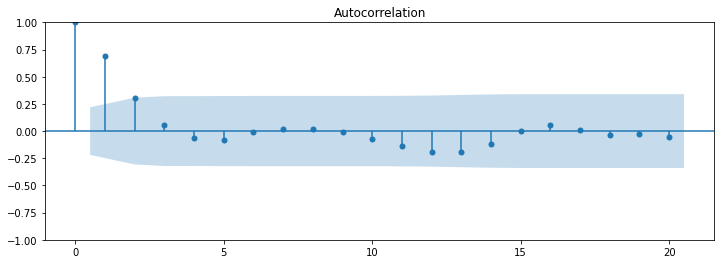

In [104]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
_ = sm.graphics.tsa.plot_acf(df, lags=20, ax=ax).savefig("../plots/ceramic_furnace_acf.png")

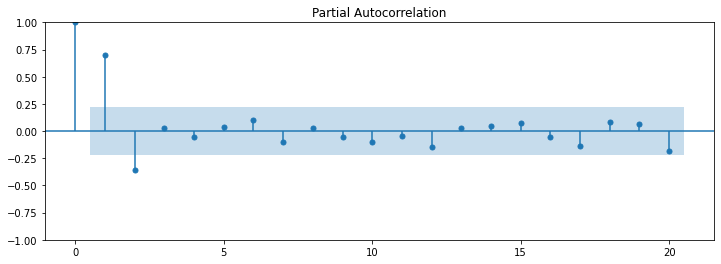

In [105]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
_ = sm.graphics.tsa.plot_pacf(df, lags=20, ax=ax).savefig("../plots/ceramic_furnace_pacf.png")